<a href='https://akademie.datamics.com/kursliste/'>![title](bg_datamics_top.png)</a>
___
<center><em>© Datamics</em></center>
<center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>


# DEPLOYMENT

**Willkommen zum Abschnitt Deployment (etwa: Aushebung). In diesem Kursabschnitt gehen wir über den gesamten Deployment-Prozess, beginnend mit dem Entwurf eines anwendungsfähigen Modells, welches dann nutzbar für andere deployed wird, entweder als API oder Web-Interface.**

# Der Datensatz

In diesem Beispiel verwenden wir einen sehr gebräuchlichen Datensatz, den [Iris-Datensatz](https://en.wikipedia.org/wiki/Iris_flower_data_set), welcher Daten von Blumen enthält. 

Aus Wikipedia:
Der Iris-Blumendatensatz oder Fisher's Iris-Datensatz ist ein von dem britischen Statistiker und Biologen Ronald Fisher aufgesetzter, multivariater Datensatz, den er in seinem Paper The use of multiple measurements in taxonomic problems als ein Beispiel für lineare Diskriminanzanalyse vorstellt[1]. Manchmal wird er auch Anderson's Iris-Datensatz genannt, da Edgar Anderson die Daten gesammelt hat, um die morphologischen Variationen der Irisblumen dreier verwandter Spezies zu quantifizieren[2]. Zwei der drei Spezies wurden auf der Halbinsel Gaspé von der gleichen Weide am selben Tag gesammelt und vermessen zu der gleichen Zeit von derselben Person mit den gleichen Instrumenten[3].

Der Datensatz besteht aus 50 Proben von jeder der drei Iris-Spezien (Iris setosa, Iris virginica und Iris versicolor). Vier Merkmale wurden gemessen von jeder Probe: die Länge und Breite der Sepale und Petale in Zentimetern.

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Datenvorbereitung

### Features und Ziel

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
X = iris.drop('species',axis=1)
y = iris['species']

In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [8]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Skalierung

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
scaled_X_train = scaler.transform(X_train)

In [14]:
scaled_X_test = scaler.transform(X_test)

## Modell


### Modell erzeugen

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-04-04 14:50:01.207656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

2024-04-04 14:50:05.428416: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Modell trainieren

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(patience=10)

In [19]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/300
4/4 [==============================] - 1s 58ms/step - loss: 1.2068 - accuracy: 0.3083 - val_loss: 1.1641 - val_accuracy: 0.3000
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 1.1997 - accuracy: 0.3083 - val_loss: 1.1589 - val_accuracy: 0.3333
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1928 - accuracy: 0.3167 - val_loss: 1.1538 - val_accuracy: 0.3000
Epoch 4/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1860 - accuracy: 0.3333 - val_loss: 1.1488 - val_accuracy: 0.3000
Epoch 5/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1791 - accuracy: 0.3333 - val_loss: 1.1439 - val_accuracy: 0.3000
Epoch 6/300
4/4 [==============================] - 0s 9ms/step - loss: 1.1728 - accuracy: 0.3333 - val_loss: 1.1390 - val_accuracy: 0.3000
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1663 - accuracy: 0.3333 - val_loss: 1.1342 - val_accuracy: 0.3000
Epoch 8/300
4/4 [=====

4/4 [==============================] - 0s 10ms/step - loss: 0.9607 - accuracy: 0.6750 - val_loss: 0.9710 - val_accuracy: 0.6000
Epoch 60/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9585 - accuracy: 0.6750 - val_loss: 0.9688 - val_accuracy: 0.6000
Epoch 61/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9563 - accuracy: 0.6750 - val_loss: 0.9667 - val_accuracy: 0.6000
Epoch 62/300
4/4 [==============================] - 0s 10ms/step - loss: 0.9543 - accuracy: 0.6750 - val_loss: 0.9645 - val_accuracy: 0.6000
Epoch 63/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9522 - accuracy: 0.6750 - val_loss: 0.9622 - val_accuracy: 0.6000
Epoch 64/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9499 - accuracy: 0.6750 - val_loss: 0.9601 - val_accuracy: 0.6000
Epoch 65/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9478 - accuracy: 0.6750 - val_loss: 0.9578 - val_accuracy: 0.6000
Epoch 66/300
4/4 [=============

4/4 [==============================] - 0s 9ms/step - loss: 0.8315 - accuracy: 0.6833 - val_loss: 0.8441 - val_accuracy: 0.6000
Epoch 118/300
4/4 [==============================] - 0s 9ms/step - loss: 0.8293 - accuracy: 0.6833 - val_loss: 0.8420 - val_accuracy: 0.6000
Epoch 119/300
4/4 [==============================] - 0s 9ms/step - loss: 0.8271 - accuracy: 0.6833 - val_loss: 0.8399 - val_accuracy: 0.6000
Epoch 120/300
4/4 [==============================] - 0s 8ms/step - loss: 0.8251 - accuracy: 0.6833 - val_loss: 0.8379 - val_accuracy: 0.6000
Epoch 121/300
4/4 [==============================] - 0s 9ms/step - loss: 0.8229 - accuracy: 0.6833 - val_loss: 0.8358 - val_accuracy: 0.6000
Epoch 122/300
4/4 [==============================] - 0s 8ms/step - loss: 0.8208 - accuracy: 0.6833 - val_loss: 0.8336 - val_accuracy: 0.6000
Epoch 123/300
4/4 [==============================] - 0s 9ms/step - loss: 0.8186 - accuracy: 0.6833 - val_loss: 0.8315 - val_accuracy: 0.6000
Epoch 124/300
4/4 [========

4/4 [==============================] - 0s 9ms/step - loss: 0.6623 - accuracy: 0.8667 - val_loss: 0.6725 - val_accuracy: 0.9333
Epoch 176/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6602 - accuracy: 0.8667 - val_loss: 0.6704 - val_accuracy: 0.9333
Epoch 177/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6580 - accuracy: 0.8667 - val_loss: 0.6683 - val_accuracy: 0.9333
Epoch 178/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6559 - accuracy: 0.8833 - val_loss: 0.6666 - val_accuracy: 0.9333
Epoch 179/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6538 - accuracy: 0.9000 - val_loss: 0.6647 - val_accuracy: 0.9333
Epoch 180/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6517 - accuracy: 0.9000 - val_loss: 0.6626 - val_accuracy: 0.9333
Epoch 181/300
4/4 [==============================] - 0s 12ms/step - loss: 0.6497 - accuracy: 0.9000 - val_loss: 0.6604 - val_accuracy: 0.9333
Epoch 182/300
4/4 [=====

4/4 [==============================] - 0s 9ms/step - loss: 0.5659 - accuracy: 0.9167 - val_loss: 0.5742 - val_accuracy: 0.9333
Epoch 234/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5645 - accuracy: 0.9167 - val_loss: 0.5728 - val_accuracy: 0.9333
Epoch 235/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5631 - accuracy: 0.9167 - val_loss: 0.5712 - val_accuracy: 0.9333
Epoch 236/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5617 - accuracy: 0.9250 - val_loss: 0.5696 - val_accuracy: 0.9333
Epoch 237/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5604 - accuracy: 0.9083 - val_loss: 0.5683 - val_accuracy: 0.9333
Epoch 238/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5590 - accuracy: 0.9167 - val_loss: 0.5667 - val_accuracy: 0.9333
Epoch 239/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5577 - accuracy: 0.9250 - val_loss: 0.5654 - val_accuracy: 0.9333
Epoch 240/300
4/4 [=======

4/4 [==============================] - 0s 9ms/step - loss: 0.4947 - accuracy: 0.9333 - val_loss: 0.5036 - val_accuracy: 0.9333
Epoch 292/300
4/4 [==============================] - 0s 9ms/step - loss: 0.4936 - accuracy: 0.9333 - val_loss: 0.5026 - val_accuracy: 0.9333
Epoch 293/300
4/4 [==============================] - 0s 9ms/step - loss: 0.4925 - accuracy: 0.9333 - val_loss: 0.5015 - val_accuracy: 0.9333
Epoch 294/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.9333 - val_loss: 0.5006 - val_accuracy: 0.9333
Epoch 295/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4902 - accuracy: 0.9333 - val_loss: 0.4994 - val_accuracy: 0.9333
Epoch 296/300
4/4 [==============================] - 0s 9ms/step - loss: 0.4891 - accuracy: 0.9333 - val_loss: 0.4983 - val_accuracy: 0.9333
Epoch 297/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4882 - accuracy: 0.9333 - val_loss: 0.4972 - val_accuracy: 0.9333
Epoch 298/300
4/4 [========

## Modell evaluieren

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.206833,0.308333,1.164088,0.300000
1,1.199717,0.308333,1.158886,0.333333
2,1.192778,0.316667,1.153846,0.300000
3,1.185952,0.333333,1.148836,0.300000
4,1.179147,0.333333,1.143880,0.300000
...,...,...,...,...
295,0.489080,0.933333,0.498326,0.933333
296,0.488236,0.933333,0.497184,0.933333
297,0.486907,0.933333,0.496086,0.933333
298,0.485841,0.933333,0.495023,0.933333


<AxesSubplot:>

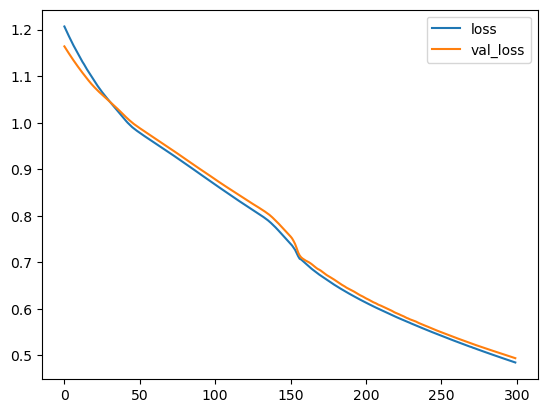

In [22]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

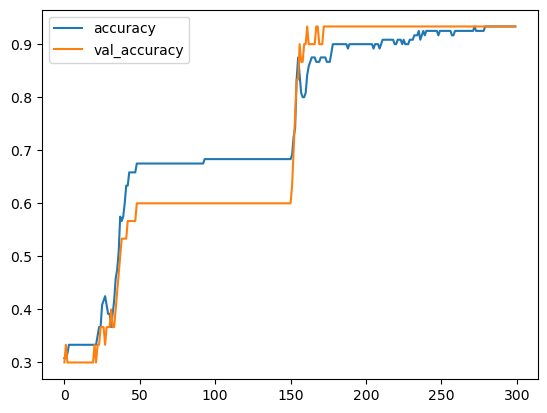

In [23]:
metrics[['accuracy','val_accuracy']].plot()

In [24]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.4939807653427124, 0.9333333373069763]

## Modell für Deployment vorbereiten

In [25]:
epochs = len(metrics)

In [26]:
scaled_X = scaler.fit_transform(X)

In [27]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0454 - accuracy: 0.6667
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0421 - accuracy: 0.6667
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0391 - accuracy: 0.6667
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0363 - accuracy: 0.6667
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0334 - accuracy: 0.6667
Epoch 6/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0305 - accuracy: 0.6667
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0276 - accuracy: 0.6667
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0247 - accuracy: 0.6667
Epoch 9/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0218 - accuracy: 0.6667
Epoch 10/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0187 - accuracy: 0.6667
Epoch 11/300
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.6933
Epoch 85/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.6933
Epoch 86/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.6933
Epoch 87/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.6933
Epoch 88/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.6933
Epoch 89/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.7000
Epoch 90/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.7067
Epoch 91/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.7067
Epoch 92/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.7067
Epoch 93/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.7067
Epoch 94/300
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.8067
Epoch 168/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.8067
Epoch 169/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.8067
Epoch 170/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8133
Epoch 171/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.8133
Epoch 172/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.8133
Epoch 173/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8133
Epoch 174/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.8200
Epoch 175/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.8200
Epoch 176/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.8200
Epoch 177/300
5/5 [=====

5/5 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8533
Epoch 250/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8600
Epoch 251/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8533
Epoch 252/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8533
Epoch 253/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8600
Epoch 254/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8667
Epoch 255/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8667
Epoch 256/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8667
Epoch 257/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8667
Epoch 258/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8667
Epoch 259/300
5/5 [=====

In [29]:
model.save("final_iris_model.h5")

### Skalierer speichern

In [30]:
# import joblib

In [31]:
#   joblib.dump(scaler,'iris_scaler.pkl')
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

## Eine einzelne neue Blume vorhersagen

In [32]:
from tensorflow.keras.models import load_model

In [33]:
flower_model = load_model("final_iris_model.h5")
import pickle
flower_scaler = pickle.load(open('scaler.sav', 'rb'))

In [34]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [35]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [36]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [37]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    # flower = scaler.transform(flower)
    
    import pickle
    scalerfile = 'scaler.sav'
    scaler = pickle.load(open(scalerfile, 'rb'))
    flower = scaler.transform(flower)

    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    # class_ind = model.predict_classes(flower)
    
    predict_x=model.predict(flower,verbose=1) 
    class_ind=np.argmax(predict_x,axis=1)
    
    return classes[class_ind][0]
                    

In [39]:
return_prediction(flower_model,flower_scaler,flower_example)

1/1 [==============================] - 0s 66ms/step


'setosa'

# CODE FÜR DEPLOYMENT:

In [40]:
from tensorflow.keras.models import load_model
import joblib

flower_model = load_model("final_iris_model.h5")
# flower_scaler = joblib.load("iris_scaler.pkl")

flower_scaler = scaler
def return_prediction(model,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    # flower = scaler.transform(flower)
    
    import pickle
    scalerfile = 'scaler.sav'
    scaler = pickle.load(open(scalerfile, 'rb'))
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    # class_ind = model.predict_classes(flower)
    predict_x=model.predict(flower,verbose=1)  
    class_ind=np.argmax(predict_x,axis=1)
    
    return classes[class_ind][0]

In [41]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}
print(return_prediction(model=flower_model,sample_json=flower_example))

1/1 [==============================] - 0s 43ms/step
setosa


# Gut gemacht!